In [35]:
#import all required modules
from PIL import Image
from tensorflow.keras.layers import Dense,Input
from keras.layers import Input , Lambda , Flatten , Dense , Dropout
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np 
import glob as glob
datagen = ImageDataGenerator()
import matplotlib.pyplot as plt

import json
import random
import cv2

import tensorflow as tf
# zero_tsr = tf.Variable([0,0])
# tf.assign(zero_tsr,[0,0])



In [36]:
# IMAGE_SIZE = [224, 224]

# train_photo='datagen.flow_from_directory('train_photo/', class_mode='binary', batch_size=64)'
# val_photo='datagen.flow_from_directory('val_photo/', class_mode='binary', batch_size=64)'

In [37]:
IMAGE_SIZE = [224, 224]

train_photo = 'train_photo/'
test_photo = 'test_photo/'
val_photo = 'val_photo/'


In [38]:
myvgg = VGG16(input_shape=IMAGE_SIZE +  [3], weights='imagenet', include_top=False)

In [39]:
for layer in myvgg.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(myvgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [40]:
myfolders = glob.glob('Desktop\mlops-ws\train_photo')

In [41]:
#x = Flatten()(myvgg.output)

In [42]:
def addTopmodel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")( top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")( top_model)
    return top_model

myvgg.input
myvgg.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x0000020BB4D3AF48>>

In [43]:
num_classes = 2

This_fc = addTopmodel(myvgg, num_classes)

model = Model(inputs=myvgg.input, outputs=This_fc)

print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [44]:
model = Model(inputs=myvgg.input, output=This_fc)

C:\Users\HP\anaconda3\envs\mykeras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [46]:
train_set = train_datagen.flow_from_directory('train_photo/',
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test_photo/',
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 2610 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [47]:

    
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)
nb_train_samples = 149
nb_validation_samples = 19 
epochs = 5
batch_size = 16
    
'''history = model.fit_generator(train_photo,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_photo,
                      nb_val_samples = 2000)'''
r = model.fit_generator(
       train_set,
      steps_per_epoch = nb_train_samples //batch_size,
      validation_data=test_set,
       epochs= epochs,
     
        validation_steps= nb_validation_samples //batch_size)
   



Epoch 1/5
9/9 [==============================] - 117s 13s/step - loss: 1.1779 - accuracy: 0.7604 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 127s 14s/step - loss: 0.0388 - accuracy: 0.9861 - val_loss: 3.6845e-05 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 116s 13s/step - loss: 0.0046 - accuracy: 0.9965 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 122s 14s/step - loss: 2.9490e-04 - accuracy: 1.0000 - val_loss: 6.9952e-04 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 108s 12s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.9925e-05 - val_accuracy: 1.0000


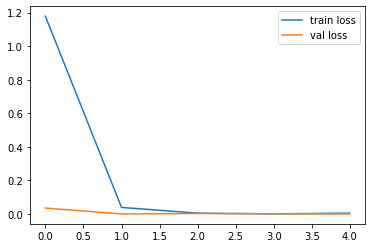

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_acc')



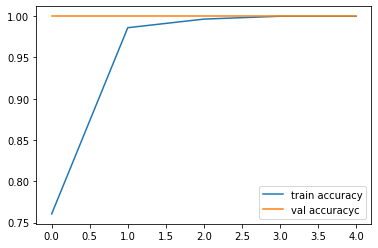

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracyc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [54]:
from keras.models import load_model

In [55]:
model.save('facefeatures_model.h5')